<a href="https://colab.research.google.com/github/vinitsu899/ANN-Churn-Modelling/blob/main/ann_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) import tensorflow library

In [ ]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)
print("GPU available:", tf.config.list_physical_devices('GPU'))

TensorFlow version: 2.19.0
GPU available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
#2) import python libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

3)upload dataset :-

In [ ]:
from google.colab import files
uploaded = files.upload()

4) head dataset :-

In [ ]:
import pandas as pd
import io

# Assuming 'Churn_Modelling (2).csv' was the uploaded file name based on kernel state
df = pd.read_csv(io.BytesIO(uploaded['Churn_Modelling (2).csv']))
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


5) Divide the data set independent and dependent feature

In [ ]:
X=df.iloc[:,3:13]
y=df.iloc[:,13]
X.head()
#print(y)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


6)feature engineering

In [ ]:
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

7) concatinate this variable with data frame

In [ ]:
columns_to_drop = []
if 'Geography' in X.columns:
  columns_to_drop.append('Geography')
if 'Gender' in X.columns:
   columns_to_drop.append('Gender')

if columns_to_drop:
    X= X.drop(['Geography','Gender'], axis=1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [ ]:
X=pd.concat([X,geography,gender],axis=1)

8) splitting the data side into training set and test  set

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

8. features scaling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

9. part 2 now let's create the Ann

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

10. let's initialized artificial neural network

In [ ]:

Classifier=Sequential()

11. adding the input layers

In [ ]:

Classifier.add(Dense(units=11,activation='relu'))

12. adding the first layer

In [ ]:

Classifier.add(Dense(units=7,activation='relu'))

13.adding the second layer

In [ ]:

Classifier.add(Dense(units=6,activation='relu'))

14. adding the output layer

In [ ]:
# Adding the output layer
Classifier.add(Dense(1, activation='sigmoid'))

# Compiling the model
Classifier.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

Early stopping

In [ ]:
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)

In [ ]:
model_history=Classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7851 - loss: 0.5382 - val_accuracy: 0.7955 - val_loss: 0.4431
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7902 - loss: 0.4426 - val_accuracy: 0.7982 - val_loss: 0.4305
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8070 - loss: 0.4281 - val_accuracy: 0.8118 - val_loss: 0.4159
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8145 - loss: 0.4069 - val_accuracy: 0.8183 - val_loss: 0.3996
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8275 - loss: 0.3790 - val_accuracy: 0.8224 - val_loss: 0.3889
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8316 - loss: 0.3811 - val_accuracy: 0.8470 - val_loss: 0.3837
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8483 - loss: 0.3675 - val_accuracy: 0.8501 - val_loss: 0.3793
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8453 - loss: 0.3703 - 

In [ ]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

16. summarise history of accuracy

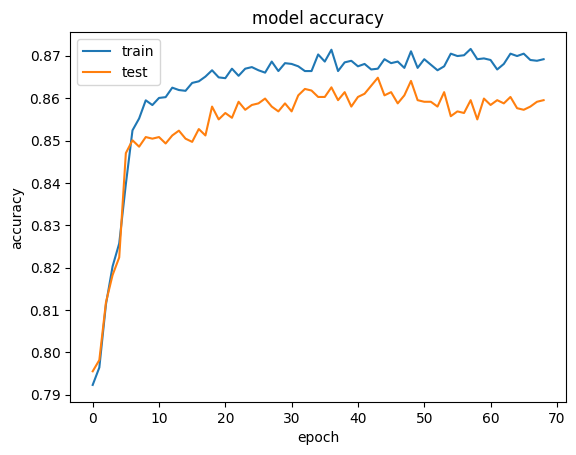

In [ ]:
#import matplotlib.pyplot as plt

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

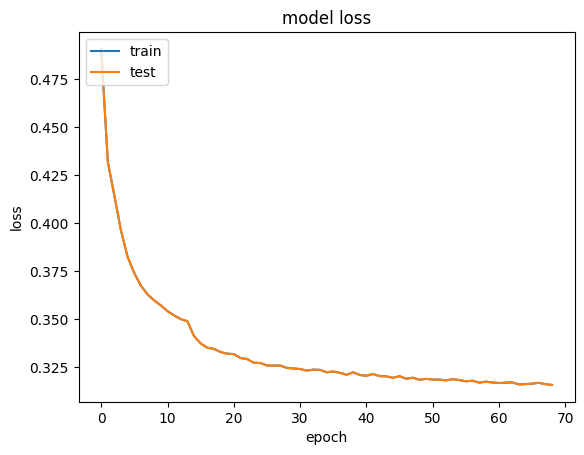

In [ ]:

# summarize history for accuracyfor loss

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

prediction classifiers

In [ ]:
y_pred=Classifier.predict(X_test)
y_pred=(y_pred>=0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


construct and confusion matrix

In [ ]:
#from sklearn.metrics import confusion_matrix

# Re-calculating y_pred to ensure it's defined
y_pred=Classifier.predict(X_test)
y_pred=(y_pred>=0.5)

cm=confusion_matrix(y_test,y_pred)
cm

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[1495,  100],
       [ 176,  229]])

accuracy score

In [ ]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [ ]:
score

0.862